## What is algorithm Analysis?

Tyring to answer the question : <font color='yellow'>When two programs solve the same problem, which one is better ?  </font> 

<font color='violet'>Better on what parameters ? </font> 

1. Readability
2. number of lines
3. amount of computing resources

What is the difference between a program and algorithm ?

<font color='pink'>Algorithm </font>: step-by-step instructions for solving a problem. 

<font color='pink'>Program </font>: algorithm that has been encoded in a particular programming language



## Big-O-Notation 

* <font color='teal'>To quanitfy the number of operations or execution steps </font>there by making execution time independent of prgram or computer 
* if execution steps = basic computation unit , then <font color='teal'>Total # of execution step = Total computation cost </font>
* Decision on the basic computation unit is difficult and depends on algorithm implementation

For summation algorithm `sum_of_n()` :

  * basic computation unit = assignment statements 
  * function have <font color="red">1+ n </font> (sum=0 + sum+=i) assignment steps
  * Time it takes to solve a problem of size $n$ is 
  
  $$ T(n) = 1+n $$

* Exact number of operations is not important rather we can only think of the dominant part of the $T(n)$
* <font color='green'>**Big-O**</font> can be defined as the <font color='green'>**Order of Magnitude** </font>function that describes the part of $T(n)$ that increases fastest as $n$ increases , $O(f(n))$ where $f(n)$ describes the dominant part of $T(n)$
$$ O(f(n)) \implies O(n) $$

For Example : $T(n) = 5n^{2} + 27n + 1005 $
$$ \implies O(n^{2}) $$  

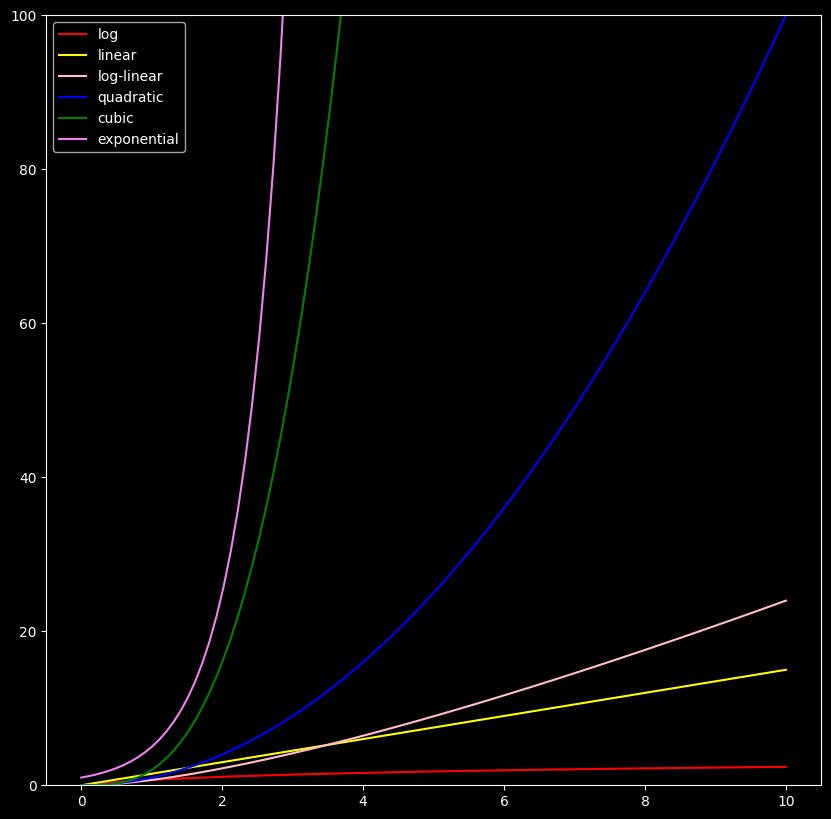

In [58]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
n = np.linspace(0,10,100)
y_log = np.log(1+n)
y_lin = 1.5*n
y_logLin = n*np.log(1+n)
qdr = n**2 
cub = 2*n**3
exp = 5**n
plt.figure(figsize=(10, 10))
plt.plot(n,y_log,'red')
plt.plot(n,y_lin,'yellow')
plt.plot(n,y_logLin,'pink')
plt.plot(n,qdr,'blue')
plt.plot(n,cub,'green')
plt.plot(n,exp,'violet')
plt.ylim([0,100])
plt.legend(['log','linear','log-linear','quadratic','cubic','exponential'])
plt.show()



Ex1: Find the $T(n)$ and **Big-O** of the code snippet given below 
    
```python
    a=5
    b=6
    c = 10
    for i in range(n):
        for j in range(n): 
            x=i*i 
            y=j*j
            z=i*j
    for k in range(n): 
        w = a * k + 45
        v=b*b 
    d = 33
```

$T(n) = 3+3n^{2}+2n+1 = 4+2n+3n^{2}  \implies O(n^{2})$

**Ex2: Minimum of a List**

 Write two functions to find the minimum number in a list. The first function should compare each number to every other number on the list $O(n^{2})$. the second function should be linear $O(n)$

In [ ]:
import time 
import numpy as np
# program to find minimum as a O(n^{2})
def find_min_1(num_list):
    start = time.time()
    for i in num_list:
        min = i
        for j in num_list:
            if min > j:
                min = j

    end = time.time()
    return min, end-start

#program to find minimum as O(n)
def find_min_2(num_list):
    start = time.time()
    min = num_list[0]
    for num in num_list:
        if min > num:
            min = num
    end = time.time()    
    return min, end-start

x = list(np.random.randint(0,100,(10000))) 
min_num, exe_time = find_min_1(x)
print(f'minimum of list is {min_num} with {exe_time:0.3e}')
min_num,exe_time = find_min_2(x)
print(f'minimum of list is {min_num} with {exe_time:0.3e}')


minimum of list is 0 with 1.581e+00
minimum of list is 0 with 1.607e-04


**Ex3: Anagram Detection** 

One string is an anagram of another if the second is simply a rearrangement of the first.

Solution 1 : Checking Off


In [76]:
def anagram_1(str1,str2):
    i = 0
    while i < len(str1):
        j = 0
        while j < len(str2):
            if str1[i] == str2[j]:
                i = i+1
                found = True
                break
            else:
                j = j+1
                found = False
        if i != len(str1)-1 and not found :
            print(i)
            return False
    return True

Each of the <font color='red'> n </font> characters in the string <font color='yellow'>s1</font> will have to match up to <font color='red'> n </font> characters in <font color='yellow'>s2</font>. This results in 
$$\sum_{i=1}^{n} i  = \frac{n(n+1)}{2} = \frac{1}{2}n^{2} + \frac{1}{2}n$$ 

$$\implies O(n^{2}) $$

Solution 2: Sort and Compare 

As the anagram are the same string if ordered alphabetically . Using this idea to program 

In [95]:
def check_anagram_two(str1,str2):
    str1_list = list(str1)
    str2_list = list(str2)
    str1_list.sort()
    str2_list.sort()
    for n in range(len(str1_list)):
        if str1_list[n] != str2_list[n]:
            return False
    return True
            

In the above solution we have a for loop which contributes to $O(n)$ but the sorting operation is either $O(n \log n)$ or $O(n^{2})$

Solution 3 : Brute Force

Here we will generate all possible strings out of <font color='yellow'>s1</font> and check if <font color='yellow'>s2</font> occurs. This results in 
$$n! = n(n-1)(n-2) \dots 1$$ 

$ n!$ grows faster than $2^{n} $

$20! = 2, 432, 902, 008, 176, 640, 000 $

In [99]:
check_anagram_two('python','typhon')

True

In [62]:
def anagram(str1,str2):
    for chr in str1:
        if chr not in str2:
            return False
    return True